# In this file we will 

Create maps with multiple data layers using matplotlib
Create interactive maps with folium

# Visualising geospatial data

We will focus on creating maps with multiple layers of geospatial data. In particular, we will cover the plotting tools offered by the matplotlib Python library, as well as interactive mapping with the folium library.

Data sources:

https://data.cityofchicago.org/

https://data.cityofchicago.org/Buildings/Building-Footprints-current-/hz9b-7nh8

https://data.cityofchicago.org/Parks-Recreation/Parks-Chicago-Park-District-Park-Boundaries-curren/ej32-qgdr

https://data.cityofchicago.org/Transportation/Major-Streets/ueqs-5wr6


In [2]:
# Import relevant libraries 

import numpy as np
import pandas as pd
import geopandas as gpd
import pysal as ps
import libpysal
import pyproj
import geopy
import cartopy as cp
import geojson
import osmnx as ox
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import bokeh
import folium
import warnings
warnings.filterwarnings('ignore')

##  Plotting with matplotlib


#### Load your data. 
Note: _Operations involving the __Building Footprint__ ._



In [3]:
neighbourhoods = gpd.read_file("/Users/abhaykumar/Desktop/dsv/gds_2/chicago_data/comarea/ComArea_ACS14_f.shp")  
supermarkets = gpd.read_file("/Users/abhaykumar/Desktop/dsv/gds_2/chicago_data/grocery/chicago_sup.shp")


In [4]:
streets = gpd.read_file("/Users/abhaykumar/Desktop/dsv/gds_3/chicago_data_2/Major_Streets/Major_Streets.shp")

In [5]:
parks = gpd.read_file("/Users/abhaykumar/Desktop/dsv/gds_3/chicago_data_2/Parks/Parks.shp")

This may take time as file size is big

In [6]:
buildings = gpd.read_file("/Users/abhaykumar/Desktop/dsv/gds_3/chicago_data_2/Building_Footprint/bfootprint.shp")

#### Create plot (axis) object for Chicago neighbourhoods.



<Axes: >

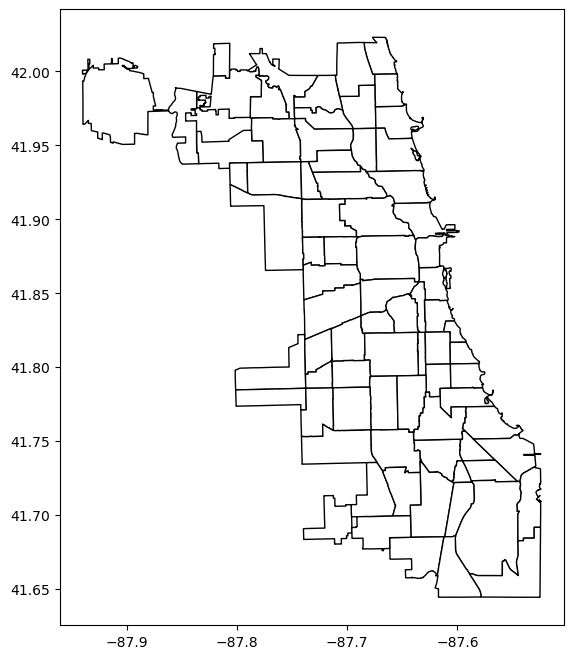

In [8]:
fig, ax = plt.subplots(1,1, figsize = (8, 8))
neighbourhoods.plot(ax = ax, facecolor = "white", edgecolor = "black")

#### Add supermarkets to the same plot.


<Axes: >

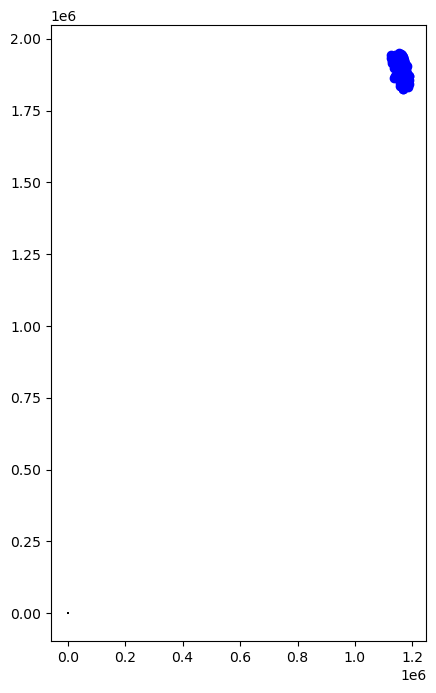

In [9]:
fig, ax = plt.subplots(1,1, figsize = (8, 8))
neighbourhoods.plot(ax = ax, facecolor = "white", edgecolor = "black")
supermarkets.plot(ax = ax, facecolor = "blue")

#### Inspect the CRS of the datasets _neighbourhoods_ and _supermarkets.


In [10]:
neighbourhoods.crs

<Geographic 2D CRS: GEOGCS["WGS84(DD)",DATUM["WGS_1984",SPHEROID["WGS8 ...>
Name: WGS84(DD)
Axis Info [ellipsoidal]:
- lon[east]: Longitude (Degree)
- lat[north]: Latitude (Degree)
Area of Use:
- undefined
Datum: World Geodetic System 1984
- Ellipsoid: WGS84
- Prime Meridian: Greenwich

In [11]:
supermarkets.crs

<Projected CRS: PROJCS["Transverse_Mercator",GEOGCS["GCS_GRS 1980( ...>
Name: Transverse_Mercator
Axis Info [cartesian]:
- [east]: Easting (US survey foot)
- [north]: Northing (US survey foot)
Area of Use:
- undefined
Coordinate Operation:
- name: unnamed
- method: Transverse Mercator
Datum: D_unknown
- Ellipsoid: GRS80
- Prime Meridian: Greenwich

#### So, reproject all datasets to EPSG:26916.


In [12]:
neighbourhoods = neighbourhoods.to_crs("EPSG:26916")
supermarkets = supermarkets.to_crs("EPSG:26916")
streets = streets.to_crs("EPSG:26916")
buildings = buildings.to_crs("EPSG:26916")
parks = parks.to_crs("EPSG:26916")

#### Now, replot the Chicago neighbourhoods and supermarkets.

<Axes: >

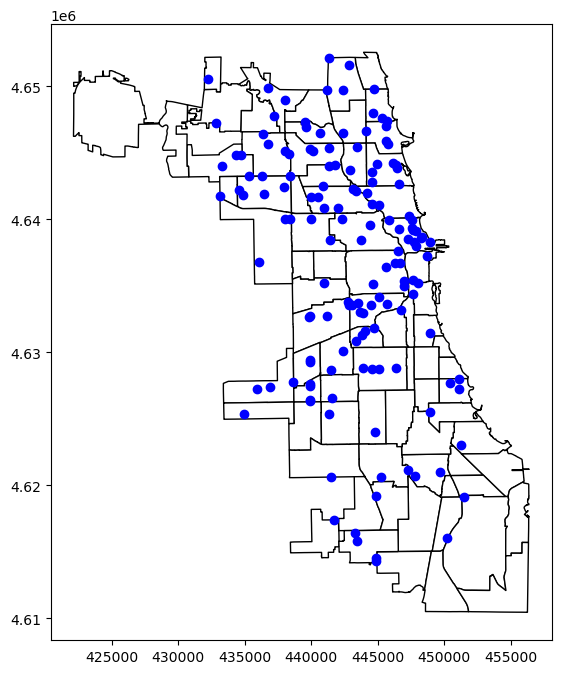

In [13]:
fig, ax = plt.subplots(1,1, figsize = (8, 8))
neighbourhoods.plot(ax = ax, facecolor = "white", edgecolor = "black")
supermarkets.plot(ax = ax, facecolor = "blue")

The neighbourhoods and supermarkets layers now show up correctly on our map.

### With all our data in order, we will now map the buildings across Chicago.
_**Note:** Given the size of the Building Footprint dataset, it will take time to render

<Axes: >

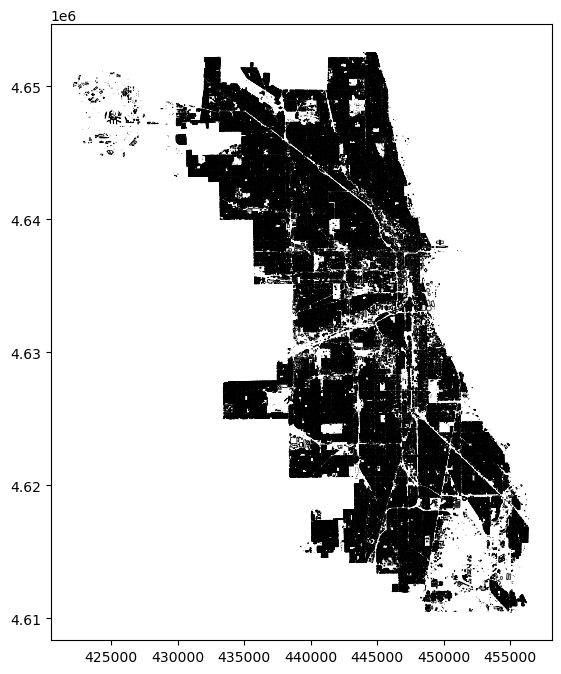

In [14]:
fig, ax = plt.subplots(1,1, figsize = (8, 8))
buildings.plot(ax = ax, edgecolor = "black", linewidth = 0.5, facecolor = "white")

There are way too many buildings for us to visualise them in a meaningful way at this scale...

#### So, let us zoom in on one section of Chicago by defining the _axis limits_ of our plot.

In [15]:
xmin, xmax = 446500, 449500
ymin, ymax = 4636000, 4639000

#### Plot the map again and set the x/y limits for the axes.

(4636000.0, 4639000.0)

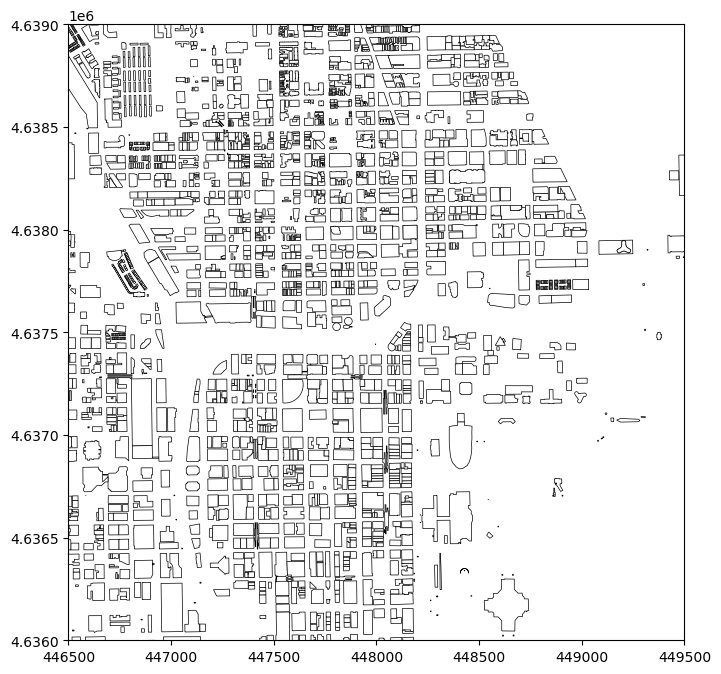

In [16]:
fig, ax = plt.subplots(1,1, figsize = (8, 8))
buildings.plot(ax = ax, edgecolor = "black", linewidth = 0.5, facecolor = "white")

ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])

Now we can see each building more clearly!

#### We can also colour the buildings based on various building attributes, e.g., based on the number of storeys/floors in the building.


(4636000.0, 4639000.0)

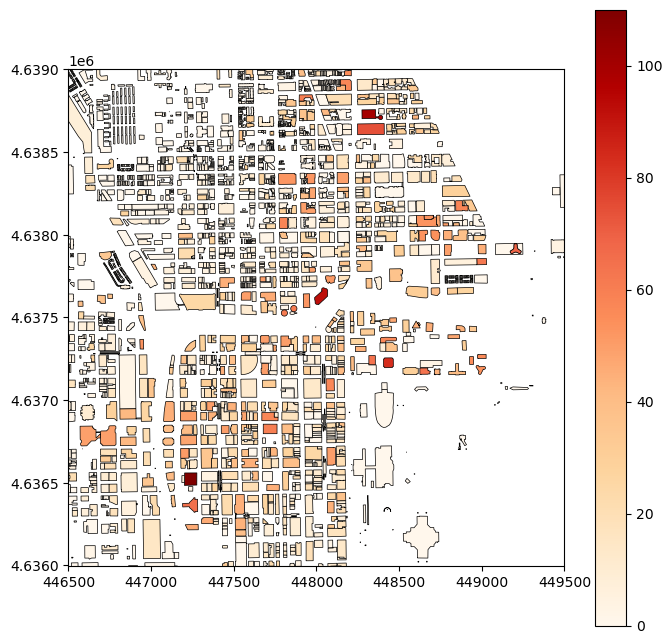

In [17]:
fig, ax = plt.subplots(1,1, figsize = (8, 8))
buildings.plot(ax = ax, edgecolor = "black", linewidth = 0.5, column = "stories", cmap ="OrRd", legend = True)

ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])

As indicated by the legend on the right, the darker the orange/red colouring, the greater the number of floors in the building! From this map, we can see that most buildings in this part of Chicago have fewer than 40 storeys.

#### We can also add more context to the map by including additional features such as the main street network, pedestrian paths, and parks.



(4636000.0, 4639000.0)

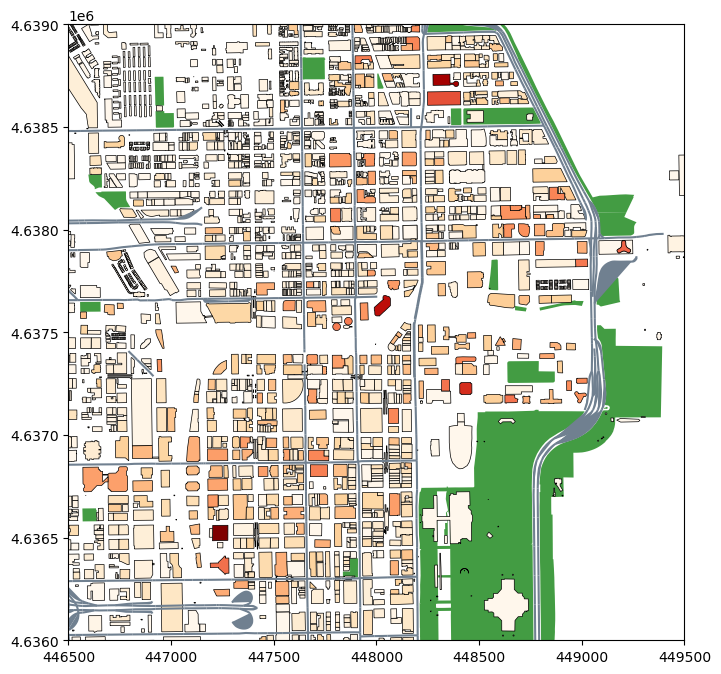

In [18]:
fig, ax = plt.subplots(1,1, figsize = (8, 8))
parks.plot(ax = ax, facecolor = 'forestgreen', alpha = 0.85)
buildings.plot(ax = ax, edgecolor = "black", linewidth=0.5, column="stories", cmap="OrRd", legend = False) 
streets.plot(ax = ax, facecolor = "slategray", edgecolor = "slategray")

ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])

(4636000.0, 4639000.0)

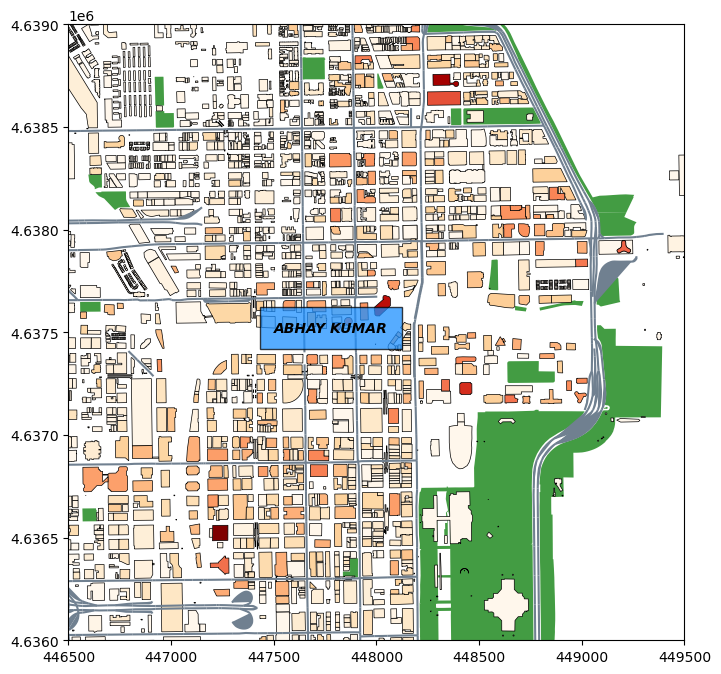

In [19]:
fig, ax = plt.subplots(1,1, figsize = (8, 8))
parks.plot(ax = ax, facecolor = 'forestgreen', alpha = 0.85)
buildings.plot(ax = ax, edgecolor = "black", linewidth=0.5, column="stories", cmap="OrRd", legend = False)
streets.plot(ax = ax, facecolor = "slategray", edgecolor = "slategray")
ax.text(447500, 4637500, 'ABHAY KUMAR', style='italic', weight = 'bold', bbox = {'facecolor': 'dodgerblue', 'alpha': 0.75, 'pad': 10})

ax.set_xlim([xmin, xmax])
ax.set_ylim([ymin, ymax])

##  Plotting with folium
Source: https://python-visualization.github.io/folium/

To plot a basemap of your location of interest (in our case, Chicago), we need to pass latitude (lat) and longitude (long) parameters to the `folium.Map()` function.

In [20]:
nbhd_locations = neighbourhoods
nbhd_locations = nbhd_locations.to_crs("EPSG:4326") 
nbhd_locations['lat'] = (nbhd_locations.centroid.y)
nbhd_locations['lon'] = (nbhd_locations.centroid.x) 
nbhd_locations.head()

ComAreaID        community  TRACTCnt    shape_area     shape_len  Pop2012  \
0         35          DOUGLAS        10  4.600462e+07  31027.054510    18238   
1         36          OAKLAND         3  1.691396e+07  19565.506153     5918   
2         37      FULLER PARK         2  1.991670e+07  25339.089750     2876   
3         38  GRAND BOULEVARD        14  4.849250e+07  28196.837157    21929   
4         39          KENWOOD         7  2.907174e+07  23325.167906    17841   

   Pop2014  PopChng  PopM    PopMP  ...  ProstateC  Stroke  ChlBLLS  ChlLeadP  \
0    19430   3.1645  8294  42.6866  ...       85.5    62.1    482.2         0   
1     6473   4.4791  2499  38.6065  ...       54.2    43.7    435.4         0   
2     2543  -6.1450  1218  47.8962  ...       70.5    82.4    489.9         2   
3    22531   1.3540  9681  42.9675  ...       39.0    46.7    590.4         1   
4    18217   1.0428  8543  46.8958  ...       46.2    31.5    397.9         0   

   GonorrF  GonorrM  Tuberc  \
0   1063.3    727.4     4.2   
1   1655.4   1629.3     6.7   
2   1061.9   1556.4     0.0   
3   1454.6   1680.0    13.2   
4    610.2    549.1     0.0   

                                            geometry        lat        lon  
0  POLYGON ((-87.60914 41.84469, -87.60915 41.844...  41.835118 -87.618678  
1  POLYGON ((-87.59215 41.81693, -87.59231 41.816...  41.823750 -87.603216  
2  POLYGON ((-87.62880 41.80189, -87.62879 41.801...  41.809085 -87.632425  
3  POLYGON ((-87.60671 41.81681, -87.60670 41.816...  41.812949 -87.617860  
4  POLYGON ((-87.59215 41.81693, -87.59215 41.816...  41.808916 -87.596184  

[5 rows x 89 columns]

#### Create folium basemap with lat/lon information.


In [21]:
m = folium.Map(location=[nbhd_locations.lat.mean(), nbhd_locations.lon.mean()], 
               zoom_start=12, 
               tiles='cartodbpositron', 
               control_scale=True)
m

In [22]:
supermarket_locations = supermarkets[["Chain", "geometry"]]

In [23]:
supermarket_locations = supermarket_locations.to_crs("EPSG:4326")

In [24]:
supermarket_locations['lat'] =supermarket_locations.centroid.y

In [25]:
supermarket_locations['lon'] =supermarket_locations.centroid.x

In [26]:
supermarket_locations.head()

Chain                         geometry        lat        lon
0      VIET HOA PLAZA  MULTIPOINT (-87.65661 41.97321)  41.973210 -87.656613
1   COUNTY FAIR FOODS  MULTIPOINT (-87.68136 41.69713)  41.697131 -87.681361
2  WHOLE FOODS MARKET  MULTIPOINT (-87.63918 41.86847)  41.868471 -87.639184
3        TARGET/SUPER  MULTIPOINT (-87.65495 41.87783)  41.877830 -87.654948
4         FOOD 4 LESS  MULTIPOINT (-87.62715 41.73623)  41.736225 -87.627146

In [27]:
m = folium.Map(location=[nbhd_locations.lat.mean(), nbhd_locations.lon.mean()], 
                 zoom_start=12, tiles='cartodbpositron', control_scale=True)

for i, location in supermarket_locations.iterrows():
    folium.Marker([location["lat"], location["lon"]], popup=location["Chain"]).add_to(m)

m

If we click on any of the markers on the map.
A pop-up with the name of supermarket chain at that particular location will appear.


#### Now we will add neighbourhood boundaries. 


In [28]:
neighbourhoods_geo = nbhd_locations.to_json()

In [29]:
m = folium.Map(location=[nbhd_locations.lat.mean(), nbhd_locations.lon.mean()], 
                 zoom_start=12, tiles='cartodbpositron', control_scale=True)
folium.GeoJson(neighbourhoods_geo, name="Boundaries").add_to(m)
folium.LayerControl().add_to(m)
m

We can now see the neighbourhood boundaries drawn on the map.we can also choose whether or not we want this layer to be displayed. 

In [33]:
m = folium.Map(location=[nbhd_locations.lat.mean(), nbhd_locations.lon.mean()], 
                 zoom_start=12, tiles='cartodbpositron', control_scale=True)

cp = folium.Choropleth( 
    name = "Violent crimes (2014)", # name for your overlay layer
    geo_data = neighbourhoods_geo, # geojson object containing your polygon boundaries
    data = neighbourhoods, # dataframe containing your statistical variables
    columns = ["community", "Violent_C"], # relevant columns from your data table
    key_on = "feature.properties.community", # key that is shared between both geo_data and data
    fill_color = "OrRd", 
    fill_opacity = 0.7,
    line_opacity = 0.2, 
    legend_name = "Violent crimes").add_to(m) 

folium.GeoJsonTooltip(['community', 'Violent_C']).add_to(cp.geojson) 

folium.LayerControl().add_to(m) 

m

### Now creating a choropleth map showing how the per capita income varies across Chicago.


In [34]:
m = m = folium.Map(location=[nbhd_locations.lat.mean(), nbhd_locations.lon.mean()], 
                 zoom_start=12, tiles='cartodbpositron', control_scale=True) 

cp2 = folium.Choropleth(
    name = "Per capita income (2014)",
    geo_data = neighbourhoods_geo,
    data = neighbourhoods,
    columns = ["community", "PerCInc14"],
    key_on = "feature.properties.community",
    fill_color = "PiYG",
    fill_opacity = 0.7,
    line_opacity = 0.2,
    legend_name = "USD/year").add_to(m)

folium.GeoJsonTooltip(['community', 'Violent_C']).add_to(cp.geojson)

folium.LayerControl().add_to(m)

m